## Assignment 771768 - Introduction to Programming For Artificial Intelligence and Data Science 

## Name :OLAMIDE BANKOLE

## Student ID: 202428313

## Importing Libraries

In [35]:
#Let's import all the libraries needed for this assignment

import csv
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1 - Read in the provided ACW Data using the CSV library

In [33]:
## Define a function to open the csv file 
def open_csv_file(filepath_csv):
    
    try:
        with open(filepath_csv, mode='r') as csv_file: 
            csv_reader = csv.reader( csv_file, delimiter=',' )  # Read the content of the file
            csv_content = [line for line in csv_reader]
        return csv_content
    
    except FileNotFoundError:
        print(f"Oops! {filepath_csv} can not be found") # Error handling for the case where the acw file cannot be found
   
    # Error handling for the case where there is an error reading the file)
    except Exception as e:
        print("Oops, an error has occurred while reading this file.") 

# Usage example:
filepath_csv = 'acw_user_data.csv' #define the path to the file we need

# Call the function to open and read the CSV file
csvfile_data = open_csv_file(filepath_csv)
csvfile_data


[['Address Street',
  'Address City',
  'Address Postcode',
  'Age (Years)',
  'Distance Commuted to Work (Km)',
  'Employer Company',
  'Credit Card Start Date',
  'Credit Card Expiry Date',
  'Credit Card Number',
  'Credit Card CVV',
  'Dependants',
  'First Name',
  'Bank IBAN',
  'Last Name',
  'Marital Status',
  'Yearly Pension (Dollar)',
  'Retired',
  'Yearly Salary (Dollar)',
  'Sex',
  'Vehicle Make',
  'Vehicle Model',
  'Vehicle Year',
  'Vehicle Type'],
 ['70 Lydia isle',
  'Lake Conor',
  'S71 7XZ',
  '89',
  '0',
  'N/A',
  '08/18',
  '11/27',
  '676373692463',
  '875',
  '3',
  'Kieran',
  'GB62PQKB71416034141571',
  'Wilson',
  'married or civil partner',
  '7257',
  'True',
  '72838',
  'Male',
  'Hyundai',
  'Bonneville',
  '2009',
  'Pickup'],
 ['00 Wheeler wells',
  'Chapmanton',
  'L2 7BT',
  '46',
  '13.72',
  'Begum-Williams',
  '08/12',
  '11/26',
  '4529436854129855',
  '583',
  '1',
  'Jonathan',
  'GB37UMCO54540228728019',
  'Thomas',
  'married or civil pa

In [43]:
# To extract the header row
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.reader( csv_file, delimiter=',' )
    
    # Enumerate through the lines of the CSV reader to get both the index and the content of the line
    for headers, line in enumerate(csv_reader):
        if headers == 0: # Check if the current line is the header row/first line
            print(headers, line)
        

0 ['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


## 2 - Convert all flat structures into nested structures

In [27]:
  #lets create safe_value function which will do the following for error handling
# Convert the values to the specified type integer/float if valid; otherwise, set to None.
# Handle empty or non-integer values, appending line_number to problematic_rows if conversion fails

def safe_value(value, value_type, line_number, problematic_rows, default_value=None):

    try:
        # Convert the value to the specified type if it's not an empty string
        return value_type(value) if value.strip() != "" else default_value
    
    except (ValueError, TypeError):
        # Append the line number to problematic_rows for any errors in conversion
        problematic_rows.append(line_number)
        return default_value


## Define a function to modify rows and handle missing or problematic data
def modified_row(row, line_number, problematic_rows):

     # Check for empty "Dependants" and replace with "No dependants"
    if len(row["Dependants"].strip()) == 0:
        problematic_rows.append(line_number)  # Track problematic row
        row["Dependants"] = "0"  # Set default value for empty "Dependants"
    
    customer_record = {}  # Initialize an empty dictionary to store customer data

    # Key and value including error handling to safely handle conversions and missing key
    customer_record["first_name"] = row["First Name"] if "First Name" in row else None
    customer_record["last_name"] = row["Last Name"] if "Last Name" in row else None
    
 
    #Handle age using safe_value
    customer_record["age"] = safe_value(row["Age (Years)"], int, line_number, problematic_rows, default_value=None)
    
    customer_record["sex"] = row["Sex"] if "Sex" in row else None
    customer_record["retired"] = row["Retired"].strip().lower() == 'true' if "Retired" in row else None
    customer_record["marital_status"] = row["Marital Status"] if "Marital Status" in row else None
    customer_record["dependants"] = safe_value(row["Dependants"], int, line_number, problematic_rows, default_value=0)

    # Handle the other fields with type conversion using the safe_value function
    customer_record["yearly_salary"] = safe_value(row["Yearly Salary (Dollar)"], int, line_number, problematic_rows, default_value=None)
    customer_record["yearly_pension"] = safe_value(row["Yearly Pension (Dollar)"], int, line_number, problematic_rows, default_value=None)
    customer_record["employer"] = row["Employer Company"] if row["Employer Company"] else None
    customer_record["commute_distance"] = safe_value(row["Distance Commuted to Work (Km)"], float, line_number, problematic_rows, default_value=None)
    
    
    # Handle "Vehicle" field with safe_value for the "year" field
    customer_record["Vehicle"] = {
        "make": row["Vehicle Make"] if "Vehicle Make" in row else None,
        "model": row["Vehicle Model"] if "Vehicle Model" in row else None,
        "year": safe_value(row["Vehicle Year"], int, line_number, problematic_rows, default_value=None),
        "category": row["Vehicle Type"] if "Vehicle Type" in row else None
    }

    # Handle "Credit Card" field with safe_value for "cvv" field
    customer_record["Credit Card"] = {
        "start_date": row["Credit Card Start Date"] if "Credit Card Start Date" in row else None,
        "end_date": row["Credit Card Expiry Date"] if "Credit Card Expiry Date" in row else None,
        "number": row["Credit Card Number"] if "Credit Card Number" in row else None,
        "cvv": safe_value(row["Credit Card CVV"], int, line_number, problematic_rows, default_value=None),
        "iban": row["Credit Card IBAN"] if "Credit Card IBAN" in row and row["Credit Card IBAN"] else None
    }

    # Handle "Address" field (no conversion needed)
    customer_record["Address"] = {
        "street": row["Address Street"] if "Address Street" in row else None,
        "city": row["Address City"] if "Address City" in row else None,
        "postcode": row["Address Postcode"] if "Address Postcode" in row else None
    }

    return customer_record


# Load CSV file and apply transformation
def load_and_modify_csv(file_path):
    modified_data = []  # Initialize an empty list to store the modified customer data from the CSV
    problematic_rows = []  # Track rows with empty 'Dependants'
    
    with open(file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        
        headers = None
        for line_number, line in enumerate(csv_reader):
            if line_number == 0:
                # First row is headers
                headers = line
            
            else:
                # Creating a dictionary for each row using headers
                row_dict = {headers[i]: line[i] for i in range(len(headers))}
                
                # Transforming the row and track problematic entries
                transformed_row = modified_row(row_dict, line_number, problematic_rows)
                
                # Append the transformed row to modified data
                modified_data.append(transformed_row)

    return modified_data, problematic_rows  # Return data and problematic rows


# Run the function to modify data and assign to new variable
new_jsonfile, problematic_rows = load_and_modify_csv('acw_user_data.csv')
modified_data = new_jsonfile

# Calling the modified_data to display the final transformed data in a structured format 
print("Done!")
modified_data


Done!


[{'first_name': 'Kieran',
  'last_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependants': 3,
  'yearly_salary': 72838,
  'yearly_pension': 7257,
  'employer': 'N/A',
  'commute_distance': 0.0,
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': 2009,
   'category': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': '676373692463',
   'cvv': 875,
   'iban': None},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Jonathan',
  'last_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': 1,
  'yearly_salary': 54016,
  'yearly_pension': 0,
  'employer': 'Begum-Williams',
  'commute_distance': 13.72,
  'Vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': 1996,
   'category': 'Coupe'},
  'Credit Card': {'start_date': '08/1

## 3 - Print a list where errors in the Dependants Column takes place

In [31]:
# print the row numbers in the dependants column with empty entries 

print(f"Problematic rows for dependants:", problematic_rows) 

# print the number of rows with empty entries in the dependants column 
print(f"Number of problematic rows: {len(problematic_rows)}")


Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]
Number of problematic rows: 19


## 4 - Write all records to a processed.json file in the JSON data format

In [12]:
# Lets define some reusable json_save function
def json_save(file_path, json_dump):
   
    with open(file_path, 'w') as json_file:
        json.dump(json_dump, json_file)  
# Example usage of json_save
to_save = {"name": "K Jones", "age": 30}

# Save the JSON file using the reusable json_save function
json_save("output.json", to_save)

print("Reusable json save function created successfully!")

Reusable json save function created successfully!


In [22]:
# Save modified data to processed.json file
def write_json_file(json_file):
    try:
        with open(json_file, mode='w') as jsonfile:
            json.dump(modified_data, jsonfile)
        print(f"{json_file} file successfully created and saved!")
    
    except Exception as e: #error handling for any errors in writing the file
        print(f"Error writing to {json_file}: {e}")  # Print error message

processed_json = write_json_file("Processed.json") # Write the modified data to a new JSON file named "Processed.json"

#Function to create a copy of the processed json file
#Do this so we do not alter anything in the processed json file

def jsonfile_copy(json_file):
    #Open the json file and load its content
    with open(json_file, mode='r') as jsonfile:
        new_json = json.load(jsonfile) # Load the contents of the JSON file into a new variable
        return new_json
    
# Load data from "processed.json" into a new variable to create a safe copy
processed_copy_json = jsonfile_copy('processed.json')
print(f"Copied {len(processed_copy_json)} records from processed.json") # print number of records copied to be ensure no record is lost


# Save the JSON file using the reusable json_save function
json_save("processedcopy.json",processed_copy_json)

print('Processed json file copy saved successfully')

Processed.json file successfully created and saved!
Copied 1000 records from processed.json
Processed json file copy saved successfully


## 5 - creating two additional file outputs, retired.json and employed.json,containing all retired customers and all employed customers respectively in JSON data format.

In [113]:
retired_json = [] # Initializing an empty list to store records of retired customers

# Loop through each record in the data
for record in processed_copy_json:
    if record['retired'] == True: # to check if the customer is marked as true for retired 
        retired_json.append(record) # If the customer is retired, add their record to the retired list

json_save('retired.json',retired_json) # Save the list of retired customers to a new JSON file named 'retired.json'

#print the number of retired customers
print(f"There are {len(retired_json)} retired customers recorded") 

employed_json = [] # Initializing an empty list to store records of employed customers

for record in processed_copy_json: # Loop through each record in the data
    if record['retired'] == False: # to check if the customer is marked as False for retired which means they are employed
        employed_json.append(record) # If the customer is employed, add their record to the employed list

json_save('employed.json',employed_json) # Save the list of employed customers to a new JSON file named 'employed.json'

#print the number of employed customers
print(f"There are {len(employed_json)} employed customers recorded")

There are 246 retired customers recorded
There are 754 employed customers recorded


## 6 - writing to a separate file, called remove_ccard.json, in the JSON data format showing customers that have more than 10 years between their start and end date 

In [43]:
# Function to check if the credit card period exceeds 10 years
def dates_diff(creditc_dict):
    # Extracting credit card information of the customers from the dictionary
    credit_cards = creditc_dict["Credit Card"]
    
    # Splitting the start and end dates into month and year components
    start = credit_cards["start_date"].split('/')
    end = credit_cards["end_date"].split('/')

    # Error handling to ensure the start and end dates are in the correct format MM/YY
    if len(start) != 2 or len(end) != 2:
        raise ValueError("Dates must be in the 'MM/YY' format.")
            
    # Extracting the month and year parts of the credit card start and end date, then convert to integers
    month_start, year_start = int(start[0]), int(start[1])
    month_end, year_end = int(end[0]), int(end[1])

    # Calculating the total difference in years, taking into account the months
    total_years_diff = (year_end - year_start) + ((month_end - month_start) / 12)

    # Flag if the total years difference is more than 10 years
    return total_years_diff > 10

# Filtering the credit card records that exceed 10 years
ten_above = [i for i in processed_copy_json if dates_diff(i)]

print(f"The number of flagged credit card customers with more than 10 years between start and end date is {len(ten_above)}")

# Writing the new filtered records to 'remove_ccard.json' file using our reusable json save function
json_save('remove_ccaf.json', ten_above)


The number of flagged credit card customers with more than 10 years between start and end date is 252


## 7 - creating a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json

In [117]:
import json

def salary_commute(json_file):
    ## Load JSON data from a file."""
    with open(json_file, 'r') as jsonfile:
        return json.load(jsonfile)

def calculate_salary_commute(customers):
   
    # Retrieve the yearly salary and commute distance for the customer (default to 0 if not present)
    for customer in customers:
        yearly_salary = customer["yearly_salary"] if "yearly_salary" in customer else 0
        commute_distance = customer["commute_distance"] if "commute_distance" in customer else 0
        
        # Calculate Salary-Commute ratio
        if commute_distance > 1:
            customer["Salary-Commute"] = yearly_salary / commute_distance
        else:
            customer["Salary-Commute"] = yearly_salary # If commute distance is 1 or less, keep salary as the metric

def sort_customers_by_commute(customers):
    ## Sort the list of customers by Salary-Commute in ascending order."""
    sorted_customers = [] # Initializing an empty list to store records of sorted customers
    while customers:
        min_customer = customers[0]

         # Iterate through the customers and find the one with the lowest Salary-Commute value
        for customer in customers:
            if customer["Salary-Commute"] < min_customer["Salary-Commute"]:
                min_customer = customer
        sorted_customers.append(min_customer)
        customers.remove(min_customer) # Remove the customer with the lowest Salary-Commute from the original list
    
    return sorted_customers


def process_customers():
     # Load customer data from the 'processed.json' file
    customers = salary_commute('processed.json')

     # Calculate Salary-Commute for each customer
    calculate_salary_commute(customers)

    # Sort customers by the Salary-Commute metric in ascending order
    sorted_customers = sort_customers_by_commute(customers)

    # Save the sorted customer data to 'commute.json'
    json_save('commute.json', sorted_customers)

# Run the process
process_customers()

print ("commute.json file created and saved successfully!")

commute.json file created and saved successfully!


## Data visualization

## Using Pandas and Seaborn

In [37]:
customer_df = pd.read_csv('./acw_user_data.csv')
customer_df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (Dollar),Retired,Yearly Salary (Dollar),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


## 1- Obtain the Data Series for Salary, and Age

## Data series and Mean for Salary 

In [26]:
#Obtain the data series for salary
customer_df['Yearly Salary (Dollar)']

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (Dollar), Length: 1000, dtype: int64

In [36]:
#fetch the Yearly Salary column for the mean salary
salary = customer_df['Yearly Salary (Dollar)']
mean_salary = salary.mean()

# printing the mean of the salary and rounding to 2 decimal places
print(f"The mean of the salary is {mean_salary:.2f}")

The mean of the salary is 57814.08


## b- Data series and median for Age 

In [28]:
#Obtain the data series for age
customer_df['Age (Years)']

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [32]:
#fetch the Age column for median age
age = customer_df['Age (Years)']
median_age = age.median()
print(f"The median of the age is {int(median_age)}")

The median of the age is 54


## 2-Performing Univariate Plots

## a.Unvariate Plot of Age - calculating how many bins would be required for a bin_width of 5 

The number of bins required for a bin width of 5 is 15


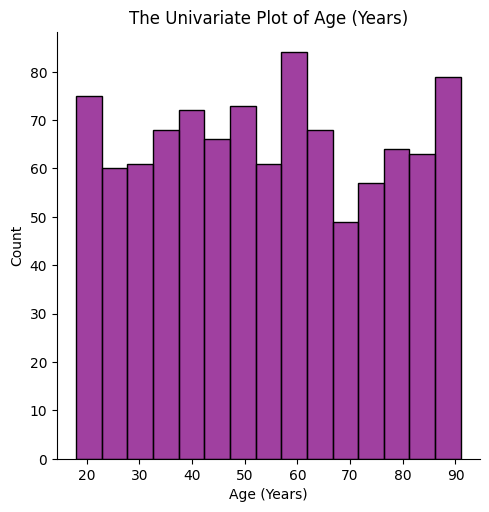

In [47]:
#Selecting the 'Age (Years)' column
age = customer_df['Age (Years)']

#Calculating how many bins would be required for a bin_width of 5
range_num = age.max() - age.min() #First calculate the range of the 'Age (Years)' column
bin_width = 5
bins_number = round(range_num / bin_width)

#Plotting the univariate distribution of 'Age (Years)' using Seaborn
age_plot = sns.displot(customer_df, x = age, binwidth =bin_width, color='purple');
plt.title (f"The Univariate Plot of Age (Years)");

#Printing the number of bins required for a bin_width of 5
print(f"The number of bins required for a bin width of {bin_width} is {bins_number}");

## b- Unvariate Plot of Dependants, fixing data errors with seaborn itself.

Mode of Dependants: 2.0


Text(0.5, 1.0, 'Univariate Plot of Dependants (Fixed)')

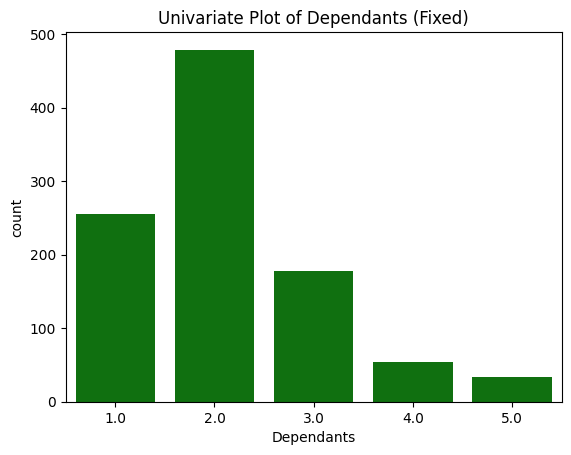

In [39]:
# Selecting the 'Dependants' column
dependants = customer_df['Dependants']

# Finding the mode of 'Dependants' to fill in the missing values
mode_dependants = dependants.mode()[0]  # Determine the mode value
print(f"Mode of Dependants: {mode_dependants}")

# Filling missing values in 'Dependants' with the mode to fix data errors
fixed_dependants = dependants.fillna(mode_dependants)  # Update column in original DataFrame replacing the missing values with the mode

# Plotting the fixed 'Dependants' data using Seaborn
dependants_plot = sns.countplot(data=customer_df, x=fixed_dependants, color="green")
plt.title("Univariate Plot of Dependants (Fixed)")

## c- Unvariate Plot of Age (default bins), conditioned on Marital Status Age on marital status

Text(0.5, 1.0, 'Univariate Plot of Age Conditioned on Marital Status')

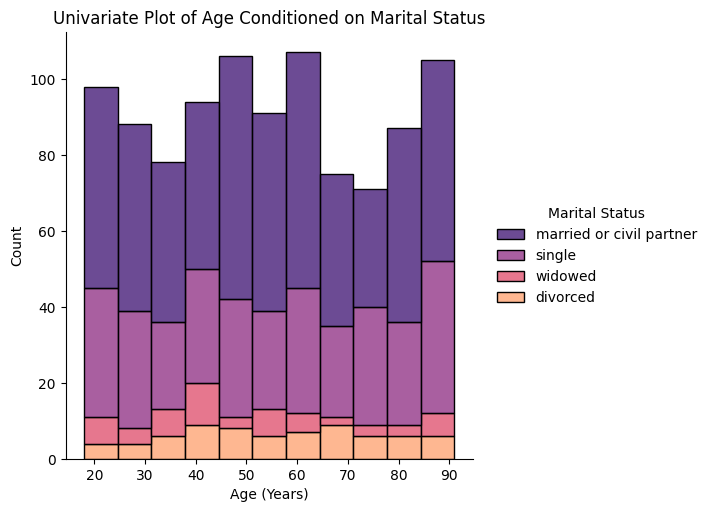

In [51]:
marital_age = sns.displot(customer_df, x='Age (Years)', hue='Marital Status',multiple='stack', palette='magma')
plt.title("Univariate Plot of Age Conditioned on Marital Status")

## 3-Performing Multiivariate Plots

## a- Multivariate plot of commuted distance against salary

Text(0.5, 1.0, 'Multivariate Plot of Commuted Distance Against Salary')

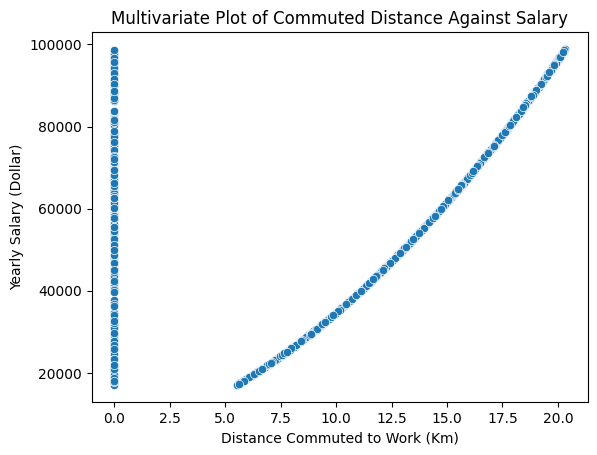

In [53]:
distance_against_salary = sns.scatterplot(customer_df, x='Distance Commuted to Work (Km)', y='Yearly Salary (Dollar)')
plt.title(f"Multivariate Plot of Commuted Distance Against Salary")

## b- Multivariate plot of age against salary 

Text(0.5, 1.0, 'Multivariate Plot of Age Against Salary')

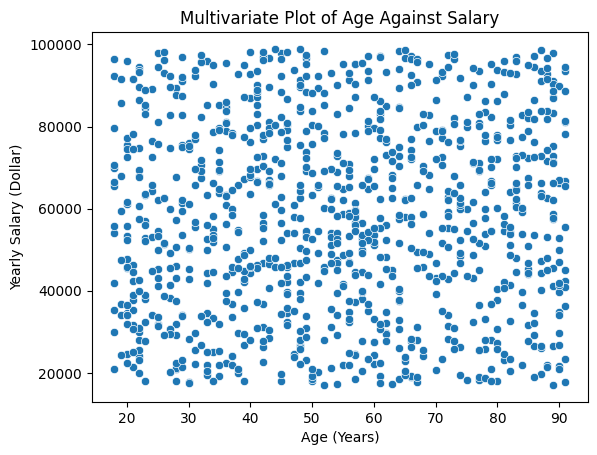

In [55]:
age_against_salary = sns.scatterplot(customer_df, x='Age (Years)', y='Yearly Salary (Dollar)')

# to add a title to the plot 
plt.title(f"Multivariate Plot of Age Against Salary")

## c- Multivariate plot of age against salary conditioned by Dependants

Text(0.5, 1.0, 'Multivariate Plot of Age against Salary conditioned by Dependants')

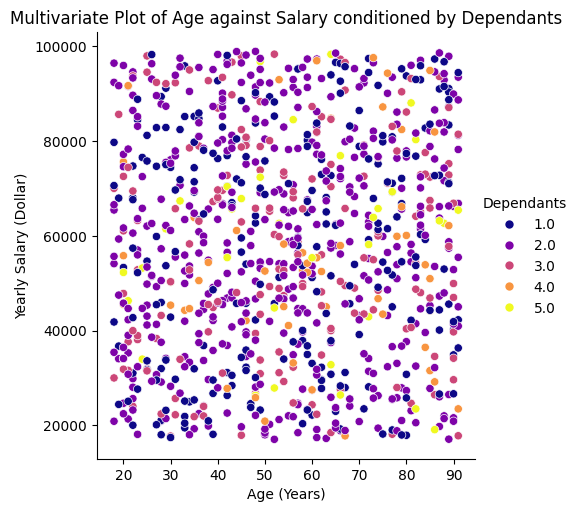

In [57]:
age_against_salary_dependants = sns.relplot(customer_df, x='Age (Years)', y='Yearly Salary (Dollar)', hue = 'Dependants', palette = "plasma")
plt.title(f"Multivariate Plot of Age against Salary conditioned by Dependants")

## 4- Saving the plots produced 

In [59]:
def plotsave(save_plot):
    for filepath, plot in save_plot.items():
        plot.figure.savefig(filepath, bbox_inches='tight') #to save and make sure the title of the plot is no longer cut off

    
plots_to_save = {}
plots_to_save["./Age Plot.png"] = age_plot
plots_to_save["./Dependants Plot.png"] = dependants_plot
plots_to_save["./Age Conditioned on Marital Status.png"] = marital_age
plots_to_save["./Commuted Distance Against Salary.png"] = distance_against_salary
plots_to_save["./Age Against Salary.png"] = age_against_salary
plots_to_save["./Age Against Salary Conditioned By Dependants.png"] = age_against_salary_dependants


plotsave(plots_to_save)
print("All plots have been successfully saved!")


All plots have been successfully saved!
